In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
import re

In [2]:
cx_Oracle.init_oracle_client(lib_dir=r"C:\instantclient-basic-windows.x64-21.9.0.0.0dbru\instantclient_21_9")

In [3]:
#db에 연결
conn = cx_Oracle.connect(user='admin', password='Tongbrown@23', dsn='tongbrown_high')
#커서 생성
cs = conn.cursor()

In [4]:
#sql 실행
sql = "select * from clien_noun"
rs = cs.execute(sql)

In [5]:
#행,열 추출
row = cs.fetchall()
colname = cs.description
col = []
for i in colname:
    col.append(i[0])

In [6]:
#DataFrame 생성
ctdf =  pd.DataFrame(row,columns = col)

In [31]:
#중복 word 제거
word = ctdf[['NOUN']].values.tolist()

word1 = sum(word,[])

word_set = set(word1)

word_list = list(word_set)

In [61]:
many_word = []
for i in range(len(word_list)):
    word_len = len(ctdf[ctdf['NOUN']==word_list[i]])
    if word_len >= 300:
        many_word.append(word_list[i])
len(many_word)

26

In [62]:
many_word

['영문',
 '주',
 '면',
 '인상',
 '금리',
 '오늘',
 '하락',
 '개미',
 '삼성',
 '신문',
 '헤드라인',
 '미국',
 '증시',
 '투자',
 '종합',
 '비지니스',
 '마감',
 '주가',
 '물가',
 '실적',
 '모음',
 '주식',
 '상승',
 '테슬라',
 '코스피',
 '환율']

In [228]:
#특정 단어 선택
N0 = ctdf[ctdf['NOUN']==many_word[0]]

In [229]:
#필요한 데이터로 데이터프레임 생성
N0_df = N0[['DATA_COUNT','DATE_WRITE']]

In [230]:
# 시간순으로 정렬
N0_s = N0_df.sort_values(by=['DATE_WRITE'])

In [231]:
#열 추출
N0_y=N0_s[['DATA_COUNT']]
N0_x=N0_s[['DATE_WRITE']]

In [232]:
#리스트로 값을 받음
x = N0_x.values.tolist()
y = N0_y.values.tolist()

In [233]:
#2차원 리스트 -> 1차원 리스트
xs = sum(x,[])
ys = sum(y,[])

In [234]:
#x축에 들어갈 날짜데이터 변환
xdata = []
for i in range(len(xs)):
    xdata.append(datetime.strptime(xs[i],'%Y-%m-%d %H:%M:%S'))

In [235]:
#y축에 들어갈 정수 변환
ydata = list(map(int,ys))

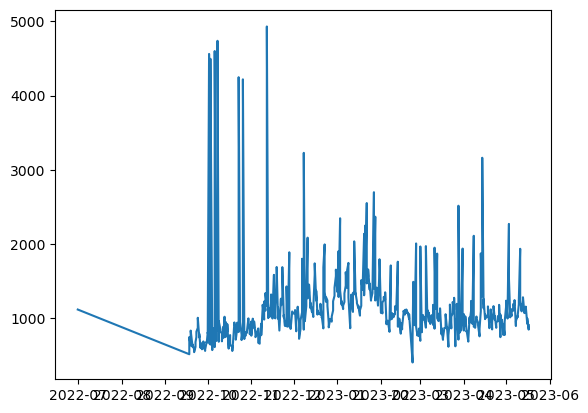

In [236]:
plt.plot(xdata,ydata)

In [237]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [238]:
N0_sr = N0_s.reset_index()

In [239]:
N0_srf = N0_sr.drop(['index'],axis=1)

In [240]:
N0_srf['DATE_WRITE'] = pd.to_datetime(N0_srf['DATE_WRITE'])

In [258]:
N0_ldf = pd.DataFrame({'day':xdata,'cnum':ydata})

In [259]:
N0_ldf

,day,cnum
0,2022-06-30 17:53:33,1119
1,2022-09-17 23:24:05,517
2,2022-09-17 23:25:25,748
3,2022-09-18 22:51:42,635
4,2022-09-18 22:52:38,835
...,...,...
480,2023-05-15 00:08:56,1158
481,2023-05-16 01:03:42,926
482,2023-05-16 01:04:27,1001
483,2023-05-17 01:30:12,849


In [260]:
N0_ldf['day'] = pd.to_datetime(N0_ldf['day']).dt.date

In [261]:
N0_ldf

,day,cnum
0,2022-06-30,1119
1,2022-09-17,517
2,2022-09-17,748
3,2022-09-18,635
4,2022-09-18,835
...,...,...
480,2023-05-15,1158
481,2023-05-16,926
482,2023-05-16,1001
483,2023-05-17,849


In [262]:
N0_day = list(N0_ldf['day'])
N0_count = list(N0_ldf['cnum'])

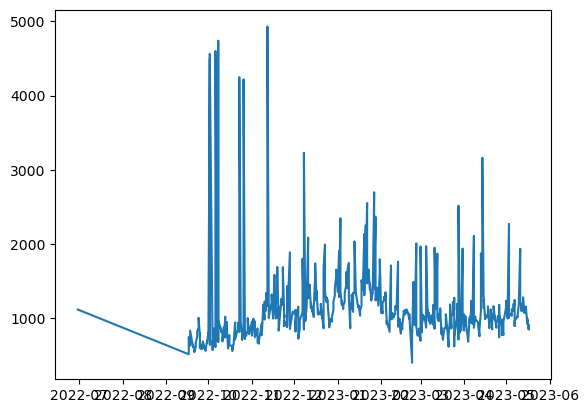

In [263]:
plt.plot(N0_day,N0_count)

In [264]:
nodf =  N0_ldf

In [265]:
nodf.index = nodf['day']
nodf.set_index('day', inplace=True)

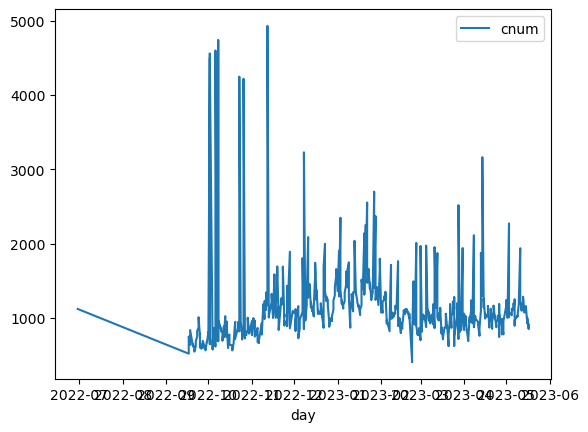

In [266]:
nodf.plot()
plt.show()

In [267]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [270]:
model = ARIMA(nodf.cnum.values, order=(2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.
